In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

C:\zhengru\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [25]:
def load_data():
    '''
    create train set and test set
    make sure you have .h5 file in your dataset
    
    Returns:
    -------
        train_set_x_orig: original train set shape is (209, 64, 64, 3) 
        train_set_y_orig: original train label shape is (209,)
        test_set_x_orig: original test set shape is (50, 64, 64, 3)
        test_set_y_orig: original test label shape is (50,)
        classes: cat or non-cat.
        
    Note:
    ----
        (209, 64, 64, 3): 209 picture,64 width,64 height,3 channel.
    '''
    train_dataset = h5py.File('data_set/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('data_set/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [26]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

In [27]:
train_x = train_x_orig.reshape(train_x_orig.shape[0],-1) / 255 
test_x = test_x_orig.reshape(test_x_orig.shape[0],-1) / 255
print('Train_x\'s shape:{}'.format(train_x.shape))
print('Test_x\'s shape:{}'.format(test_x.shape))
print("Train_y's shape:{}".format(train_y.shape))
print("Test_y's shape:{}".format(test_y.shape))

Train_x's shape:(209, 12288)
Test_x's shape:(50, 12288)
Train_y's shape:(209,)
Test_y's shape:(50,)


In [28]:
train_x_orig.shape

(209, 64, 64, 3)

In [29]:
joker = train_x_orig[0].reshape((1,64*64*3))
joker

array([[17, 31, 56, ...,  0,  0,  0]], dtype=uint8)

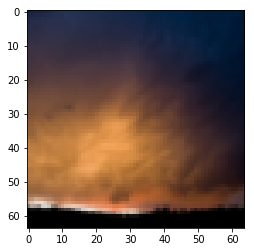

In [30]:
plt.imshow(joker.reshape(64,64,3))

y = 0. It's a non-cat picture.


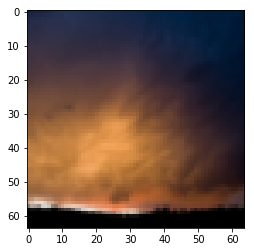

In [31]:
index = 0
plt.imshow(train_x_orig[index])

print ("y = " + str(train_y[index]) + ". It's a " + classes[train_y[index]].decode("utf-8") +  " picture.")

In [32]:
train_x = train_x_orig.reshape((209,64*64*3)) / 255
train_x

array([[0.06666667, 0.12156863, 0.21960784, ..., 0.        , 0.        ,
        0.        ],
       [0.76862745, 0.75294118, 0.74509804, ..., 0.32156863, 0.31372549,
        0.31764706],
       [0.32156863, 0.27843137, 0.26666667, ..., 0.54117647, 0.55294118,
        0.55686275],
       ...,
       [0.56078431, 0.60784314, 0.64705882, ..., 0.33333333, 0.41960784,
        0.58431373],
       [0.08627451, 0.09411765, 0.09019608, ..., 0.01568627, 0.01960784,
        0.        ],
       [0.03137255, 0.10980392, 0.20784314, ..., 0.        , 0.        ,
        0.        ]])

In [33]:
train_x = (train_x - np.mean(train_x,axis=1,keepdims=True) / np.var(train_x,axis=1,keepdims=True))
train_x

array([[ -6.43739718,  -6.38249522,  -6.28445601, ...,  -6.50406385,
         -6.50406385,  -6.50406385],
       [ -7.64816325,  -7.66384952,  -7.67169266, ...,  -8.09522207,
         -8.10306521,  -8.09914364],
       [-37.17852818, -37.22166543, -37.23343014, ..., -36.95892033,
        -36.94715563, -36.94323406],
       ...,
       [-14.93281029, -14.88575147, -14.84653578, ..., -15.16026127,
        -15.07398676, -14.90928088],
       [ -5.3123774 ,  -5.30453426,  -5.30845583, ...,  -5.38296564,
         -5.37904407,  -5.39865191],
       [-10.01536435,  -9.93693298,  -9.83889377, ..., -10.0467369 ,
        -10.0467369 , -10.0467369 ]])

In [36]:
clf = LogisticRegression()

clf.fit(train_x,train_y)
clf.score(train_x,train_y)

C:\zhengru\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

In [37]:
test_x = test_x_orig.reshape((50,64*64*3))


In [38]:
test_x = (test_x - np.mean(test_x,axis=1,keepdims=True) / np.var(test_x,axis=1,keepdims=True))

In [45]:
clf = LogisticRegression()

clf.fit(test_x,test_y)
clf.score(test_x,test_y)

C:\zhengru\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

y = 1. It's a cat picture.


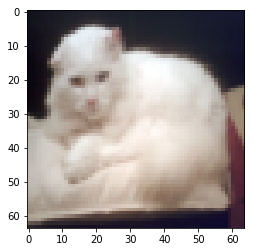

In [7]:
index = 13
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[index]) + ". It's a " + classes[train_y[index]].decode("utf-8") +  " picture.")

In [13]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB() #初始化
clf.fit(train_x, train_y)  #训练

print(clf.predict(test_x)) 

score_1 = clf.score(test_x,test_y)
score_2 = clf.score(train_x,train_y)
print(score_1,score_2)

[1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1
 1 1 0 0 1 1 0 0 0 1 1 1 1]
0.74 0.645933014354067


In [12]:

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(train_x,train_y)
print(clf.predict(test_x)) 

score_1 = clf.score(test_x,test_y)
score_2 = clf.score(train_x,train_y)
print(score_1,score_2)

C:\zhengru\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0
 1 0 0 1 0 1 0 1 1 0 1 1 0]
0.72 1.0
